## Chapter 2 - Ex1: Housing prices
- Cho dữ liệu housing-prices-dataset/train.csv
- Yêu cầu: Thực hiện các công việc sau
1. Xác định các thuộc tính
2. Phân tích đơn biến
- 2.1 Để dự đoán giá nhà, giả sử cần các thông tin sau: 'LotArea', 'YearBuilt', '1stFlrSF',
'2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd' => phân tích các biến này
3. Phân tích hai biến
4. Xử lý dữ liệu thiếu
5. Phát hiện và xử lý ngoại lệ

Note: Đây là một project với rất nhiều thuộc tính. Chúng ta chỉ thực hành trên một số thuộc
tính để biết cách làm. Khi triển khai một project thực tế cần phải lựa chọn các thuộc tính phù
hợp và thực hiện các công việc trên tất cả các thuộc tính được lựa chọn.

https://www.kaggle.com/alphaepsilon/housing-prices-dataset

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

# B1: Khám phá, xác định thuộc tính, field của dữ liệu

In [3]:
df = pd.read_csv("housing-prices-dataset/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [27]:
null_cols = df.isnull().any(axis = 0).tolist()
df.columns[null_cols]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [32]:
df.isnull().sum() #đếm các giá trị null từ các cột

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## 1. Xác định các thuộc tính
1. Input: <> SalePrice
2. Output: SalePrice
3. Type of variable:
- 3.1 Predictor: khác SalePrice
- 3.2 Target: SalePrice
4. Data Type:
- 4.1 Charactor/String
- 4.2 Numeric


In [1]:
'''
Ta thấy: yêu cầu là dự đó giá nhà (SalePrice)
=>
***thuộc tính:
Input: <> SalePrice (tất cả thuộc tính khác SalePrice)
Output: SalePrice

***các loại biến:
predictor variable: <> SalePrice (tất cả thuộc tính khác SalePrice) - các biến input
Target Variable: SalePrice - biến output

*** các type data:
string
Numeric

- **variable category**
    - Categorical: kiểu số, kiểu chuỗi, ...
    - Continuous: int, float, ...
    

'''

'\nTa thấy: yêu cầu là dự đó giá nhà (SalePrice)\n=>\n***thuộc tính:\nInput: <> SalePrice (tất cả thuộc tính khác SalePrice)\nOutput: SalePrice\n\n***các loại biến:\npredictor variable: <> SalePrice (tất cả thuộc tính khác SalePrice) - các biến input\nTarget Variable: SalePrice - biến output\n\n*** các type data:\nstring\nNumeric\n\n- **variable category**\n    - Categorical: kiểu số, kiểu chuỗi, ...\n    - Continuous: int, float, ...\n    \n\n'

## 2. Phân loại các biến định lượng (quantitative) và các biến định tính (quanlitative) trong df

**Các biến định lượng (thường là các biến có kiểu != object (numeric)**


In [4]:
### các biến định lượng (thường là các biến có kiểu != object)
numbers = [f for f in df.columns if df.dtypes[f] != "object"]  # Quantitative


<IPython.core.display.Javascript object>

In [5]:
print("Các biến định lượng (Quantitative variables)")
list_nums = ", ".join(numbers)
list_nums

Các biến định lượng (Quantitative variables)


'Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice'

<IPython.core.display.Javascript object>

**Các biến định tính (thường là các biến có kiểu là object)**


In [10]:
### các biến định tính (thường là các biến có kiểu là object)
objects = [f for f in df.columns if df.dtypes[f] == "object"]  # Qualitative

<IPython.core.display.Javascript object>

In [11]:
print("Các biến định tính (Quanlitative variables)")
list_obj = ", ".join(objects)
list_obj

Các biến định tính (Quanlitative variables)


'MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition'

<IPython.core.display.Javascript object>

### 3. Phân loại categorical variable và continuous variable

#### Categorical

In [13]:
# Categorical: (xét các biến định tính)
print("Các categorical variable trong df: \n")
i = 1
for obj in objects:
    print(i, "/", obj, "\t length = ", len(df[obj].unique()), ":", df[obj].unique())
    i = i + 1

Các categorical variable trong df: 

1 / MSZoning 	 length =  5 : ['RL' 'RM' 'C (all)' 'FV' 'RH']
2 / Street 	 length =  2 : ['Pave' 'Grvl']
3 / Alley 	 length =  3 : [nan 'Grvl' 'Pave']
4 / LotShape 	 length =  4 : ['Reg' 'IR1' 'IR2' 'IR3']
5 / LandContour 	 length =  4 : ['Lvl' 'Bnk' 'Low' 'HLS']
6 / Utilities 	 length =  2 : ['AllPub' 'NoSeWa']
7 / LotConfig 	 length =  5 : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
8 / LandSlope 	 length =  3 : ['Gtl' 'Mod' 'Sev']
9 / Neighborhood 	 length =  25 : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
10 / Condition1 	 length =  9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
11 / Condition2 	 length =  8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
12 / BldgType 	 length =  5 : ['1Fam' '2fmCon' 'Duplex'

<IPython.core.display.Javascript object>

In [19]:
# # Categorical & Continueous
# i = 1
# for obj in numbers:
#     print(
#         i,
#         "/",
#         obj,
#         "\t",
#         len(df[obj].unique()),
#         ":",
#         df[obj].unique() if len(df[obj].unique()) < 150 else "",
#     )

#     i = i + 1

<IPython.core.display.Javascript object>

In [27]:
# Categorical & Continueous
i = 1
for obj in numbers:
    print(
        i,
        "/",
        obj,
        "\t\t Unique values:",
        len(df[obj].unique()),
        "\t\t Range: ",
        (df[obj].max() - df[obj].min()),
    )

    i = i + 1

1 / Id 		 Unique values: 1460 		 Range:  1459
2 / MSSubClass 		 Unique values: 15 		 Range:  170
3 / LotFrontage 		 Unique values: 111 		 Range:  292.0
4 / LotArea 		 Unique values: 1073 		 Range:  213945
5 / OverallQual 		 Unique values: 10 		 Range:  9
6 / OverallCond 		 Unique values: 9 		 Range:  8
7 / YearBuilt 		 Unique values: 112 		 Range:  138
8 / YearRemodAdd 		 Unique values: 61 		 Range:  60
9 / MasVnrArea 		 Unique values: 328 		 Range:  1600.0
10 / BsmtFinSF1 		 Unique values: 637 		 Range:  5644
11 / BsmtFinSF2 		 Unique values: 144 		 Range:  1474
12 / BsmtUnfSF 		 Unique values: 780 		 Range:  2336
13 / TotalBsmtSF 		 Unique values: 721 		 Range:  6110
14 / 1stFlrSF 		 Unique values: 753 		 Range:  4358
15 / 2ndFlrSF 		 Unique values: 417 		 Range:  2065
16 / LowQualFinSF 		 Unique values: 24 		 Range:  572
17 / GrLivArea 		 Unique values: 861 		 Range:  5308
18 / BsmtFullBath 		 Unique values: 4 		 Range:  3
19 / BsmtHalfBath 		 Unique values: 3 		 Range:  2
20 / Full

<IPython.core.display.Javascript object>

In [41]:
"""
Quan sát kết quả trên:
Categorical Variables: là các biến có len(unique) nhỏ, range nhỏ

Continuous Variables; là các biến có len(unique) lớn, range lớn (so sánh 2 cái nha) (vd: LotFrontage, GarageArea) 
"""

'\nQuan sát kết quả trên:\nCategorical Variables: là các biến có len(unique) nhỏ, range nhỏ\n\nContinuous Variables; là các biến có len(unique) lớn, range lớn (so sánh 2 cái nha) (vd: LotFrontage, GarageArea) \n'

<IPython.core.display.Javascript object>

---
---
---

## B2: Phân tích các biến (variable analysist)

### A. Phân tích đơn biến
2.1 Để dự đoán giá nhà, giả sử cần các thông tin sau: 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd' => phân tích các biến này

In [4]:
### xét các fetures: 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'
df = df[
    [
        "LotArea",
        "YearBuilt",
        "1stFlrSF",
        "2ndFlrSF",
        "FullBath",
        "BedroomAbvGr",
        "TotRmsAbvGrd",
    ]
]
df.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


<IPython.core.display.Javascript object>

In [38]:
for col in df.columns:
    print(
        "_",
        col,
        "\tNum of Unique Values: \t",
        len(df[col].unique()),
        "\t Range: ",
        df[col].max() - df[col].min(),
    )

# print("size of df: ", df.shape)
# print("\n", df.info())

_ LotArea 	Num of Unique Values: 	 1073 	 Range:  213945
_ YearBuilt 	Num of Unique Values: 	 112 	 Range:  138
_ 1stFlrSF 	Num of Unique Values: 	 753 	 Range:  4358
_ 2ndFlrSF 	Num of Unique Values: 	 417 	 Range:  2065
_ FullBath 	Num of Unique Values: 	 4 	 Range:  3
_ BedroomAbvGr 	Num of Unique Values: 	 8 	 Range:  8
_ TotRmsAbvGrd 	Num of Unique Values: 	 12 	 Range:  12


<IPython.core.display.Javascript object>

In [133]:
"""
Từ kết quả trên, với 1460 records
=> 
Categorical variable: FullBath, BedroomAbvGr,  TotRmsAbvGrd
Continuous variable: LotArea, 1stFlrSF, 2ndFlrSF
"""

'\nTừ kết quả trên, với 1460 records\n=> \nCategorical variable: FullBath, BedroomAbvGr,  TotRmsAbvGrd\nContinuous variable: LotArea, 1stFlrSF, 2ndFlrSF\n'

<IPython.core.display.Javascript object>

### A.1: Phân tích continuous variable
#### Phân tích các biến 
- LotArea 
- 1stFlrSF 
- 2ndFlrSF

### 1. Phân tích LotArea

#### a. Tính các giá trị thống kê

In [44]:
df.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

<IPython.core.display.Javascript object>

In [88]:
# trung vị
df.LotArea.median()

9478.5

<IPython.core.display.Javascript object>

In [89]:
df.LotArea.mode()  # giá trị có số lần xuất hiện nhiều nhất trong tập dữ liệu

0    7200
dtype: int64

<IPython.core.display.Javascript object>

In [55]:
# tính range
np.ptp(df.LotArea)

213945

<IPython.core.display.Javascript object>

In [95]:
Q1 = np.quantile(df.LotArea.dropna(), 0.25)
Q3 = np.quantile(df.LotArea.dropna(), 0.75)


IQR = scipy.stats.iqr(df.LotArea.dropna())
IQR

4048.0

<IPython.core.display.Javascript object>

In [96]:
# phương sai
df.LotArea.var()

99625649.65034176

<IPython.core.display.Javascript object>

#### Xem hình dạng phân phối

In [60]:
df.LotArea.skew()

12.207687851233496

<IPython.core.display.Javascript object>

In [61]:
"""
vì df.LotArea.skew() > 0 => phân phối lệch phải
"""

'\nvì df.LotArea.skew() > 0 => phân phối lệch phải\n'

<IPython.core.display.Javascript object>

In [62]:
df.LotArea.kurtosis()

203.24327101886033

<IPython.core.display.Javascript object>

In [63]:
"""
df.LotArea.kurtosis() > 0 => phân phối của df.LotArea nhọn hơn phân phối chuẩn
"""

'\ndf.LotArea.kurtosis() > 0 => phân phối của df.LotArea nhọn hơn phân phối chuẩn\n'

<IPython.core.display.Javascript object>

#### Visualization

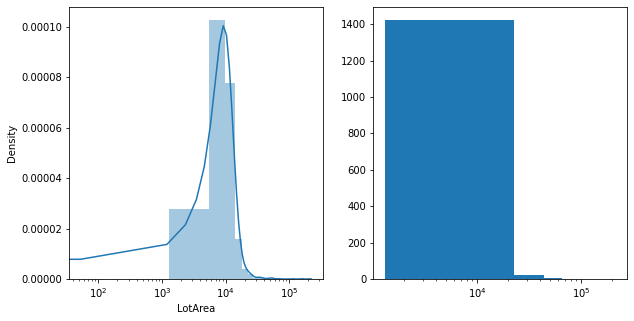

<IPython.core.display.Javascript object>

In [86]:
# Histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(df.LotArea)
plt.xscale("log")

plt.subplot(1, 2, 2)
plt.hist(df.LotArea)
plt.xscale("log")


plt.show()

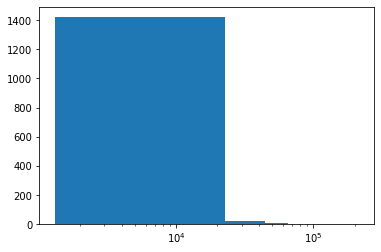

<IPython.core.display.Javascript object>

In [84]:
plt.hist(df.LotArea)
plt.xscale("log")

plt.show()

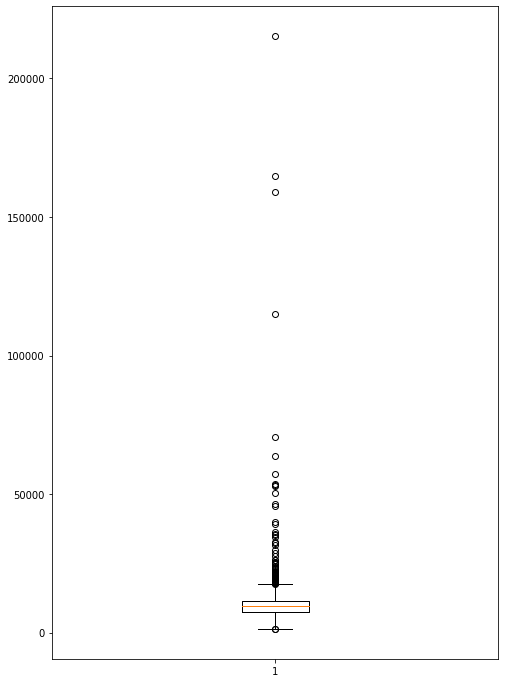

<IPython.core.display.Javascript object>

In [100]:
# boxplot
plt.figure(figsize=(8, 12))
plt.boxplot(df.LotArea)
plt.show()

In [102]:
num_upper_outliers = df[df.LotArea > Q3 + 1.5 * IQR].shape[0]
num_lower_outliers = df[df.LotArea < Q1 - 1.5 * IQR].shape[0]

print("Number of upper outliers: ", num_upper_outliers)
print("Number of lower outliers: ", num_lower_outliers)

Number of upper outliers:  67
Number of lower outliers:  2


<IPython.core.display.Javascript object>

In [111]:
# tỷ lệ phần trăm của outliers
print("Percentage of ouliers", (num_upper_outliers + num_lower_outliers) / df.shape[0])

Percentage of ouliers 0.04726027397260274


<IPython.core.display.Javascript object>

In [105]:
"""
Xem xét bỏ outliers hay ko 
"""

'\nXem xét bỏ outliers hay ko \n'

<IPython.core.display.Javascript object>

### Phân tích 1stFlrSF

In [9]:
df["1stFlrSF"].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

<IPython.core.display.Javascript object>

In [10]:
df["1stFlrSF"].median()

1087.0

<IPython.core.display.Javascript object>

In [11]:
df["1stFlrSF"].mode()

0    864
dtype: int64

<IPython.core.display.Javascript object>

In [15]:
# tính range
df["1stFlrSF"].values.ptp()

4358

<IPython.core.display.Javascript object>

#### xét hình dạng phân phối

In [16]:
scipy.stats.skew(df["1stFlrSF"])

1.3753417421837937

<IPython.core.display.Javascript object>

In [17]:
"""
=> phân phối lệch phải do skew > 0
"""

'\n=> phân phối lệch phải do skew > 0\n'

<IPython.core.display.Javascript object>

In [18]:
scipy.stats.kurtosis(df["1stFlrSF"])


5.722076026587489

<IPython.core.display.Javascript object>

In [19]:
'''
=> phân phôi nhọn hơn pp chuẩn do kutosis > 0
'''

'\n=> phân phôi nhọn hơn pp chuẩn do kutosis > 0\n'

<IPython.core.display.Javascript object>

In [24]:
Q1 = np.quantile(df["1stFlrSF"], 0.25)
Q3 = np.quantile(df["1stFlrSF"], 0.75)
IQR = abs(Q3 - Q1)
IQR

509.25

<IPython.core.display.Javascript object>

In [26]:
df["1stFlrSF"].var()

149450.07920371433

<IPython.core.display.Javascript object>

#### Visualization

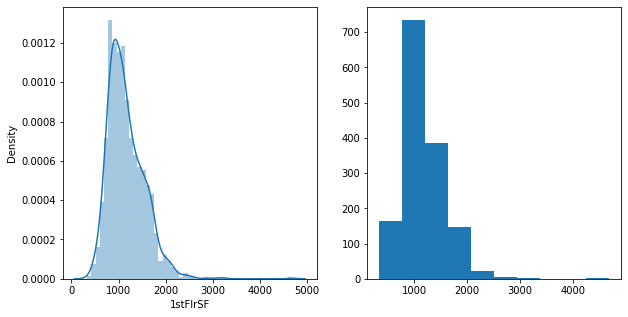

<IPython.core.display.Javascript object>

In [28]:
# Histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(df["1stFlrSF"])
plt.subplot(1, 2, 2)
plt.hist(df["1stFlrSF"])
plt.show()

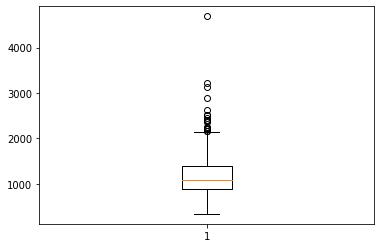

<IPython.core.display.Javascript object>

In [29]:
plt.boxplot(df["1stFlrSF"])
plt.show()

In [30]:
num_upper_outliers = df[df.LotArea > Q3 + 1.5 * IQR].shape[0]
num_lower_outliers = df[df.LotArea < Q1 - 1.5 * IQR].shape[0]

print("Number of upper outliers: ", num_upper_outliers)
print("Number of lower outliers: ", num_lower_outliers)

Number of upper outliers:  1430
Number of lower outliers:  0


<IPython.core.display.Javascript object>

In [31]:
# tỷ lệ phần trăm của outliers
print("Percentage of ouliers", (num_upper_outliers + num_lower_outliers) / df.shape[0])

Percentage of ouliers 0.9794520547945206


<IPython.core.display.Javascript object>

In [32]:
'''
Xem xét bỏ outliers ???
'''

'\nXem xét bỏ outliers ???\n'

<IPython.core.display.Javascript object>

### tương tự phân tích cho 2stFlrSF

---
---
---

## B. Categorical Variables
- FullBath
- BedroomAbvGr
- TotRmsAbvGrd

### phân tích FullBath

In [48]:
print("Mật độ phân phối: ")
df.FullBath.value_counts()

Mật độ phân phối: 


2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

<IPython.core.display.Javascript object>

In [52]:
print('Tỉ lệ mật độ phân phối:\n', df.FullBath.value_counts()/len(df.FullBath))


Tỉ lệ mật độ phân phối:
 2    0.526027
1    0.445205
3    0.022603
0    0.006164
Name: FullBath, dtype: float64


<IPython.core.display.Javascript object>

#### Visualization

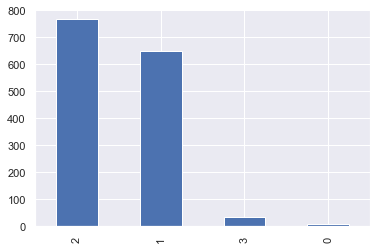

<IPython.core.display.Javascript object>

In [56]:
sns.set()
df.FullBath.value_counts().plot.bar()
plt.show()

#### Phân tích BedroomAbvGr

In [57]:
# mật độ phân phối:
df.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

<IPython.core.display.Javascript object>

In [58]:
# tỉ lệ mật độ phân phối
df.BedroomAbvGr.value_counts() / len(df.BedroomAbvGr)

3    0.550685
2    0.245205
4    0.145890
1    0.034247
5    0.014384
6    0.004795
0    0.004110
8    0.000685
Name: BedroomAbvGr, dtype: float64

<IPython.core.display.Javascript object>

#### visualization

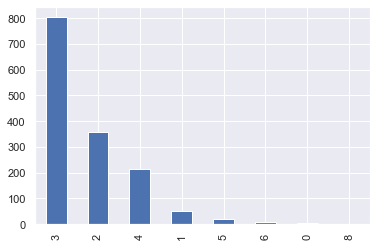

<IPython.core.display.Javascript object>

In [61]:
df.BedroomAbvGr.value_counts().plot.bar()
plt.show()

### phân tích cho đơn biến TotRmsAbvGrd tương tự

---
## 3. Phân tích 2 biến
- Continuous & Continous
- Categorical & Categorical
- Categorical & Continuous

### Continuous & Continous

#### 1. dùng trực quan hóa

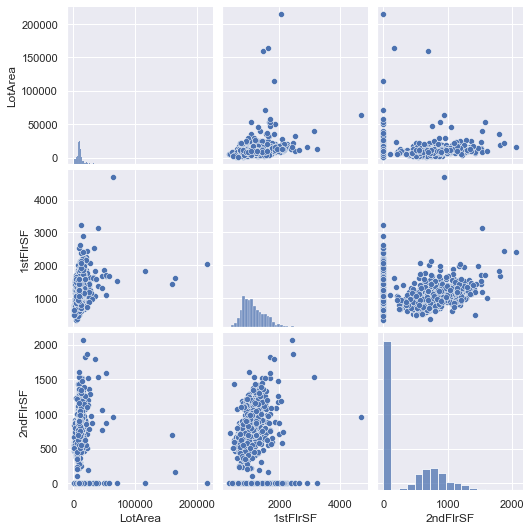

<IPython.core.display.Javascript object>

In [64]:
sns.pairplot(df[["LotArea", "1stFlrSF", "2ndFlrSF"]])
plt.show()

In [65]:
df[["LotArea", "1stFlrSF", "2ndFlrSF"]].corr()

,LotArea,1stFlrSF,2ndFlrSF
LotArea,1.000000,0.299475,0.050986
1stFlrSF,0.299475,1.000000,-0.202646
2ndFlrSF,0.050986,-0.202646,1.000000


<IPython.core.display.Javascript object>

In [66]:
"""
Từ kết quả trên, ta thấy các biến LotArea, 1stFlrSF, 2ndFlrSF đều ko có quan hệ tuyến tính.
(corr phải >0.3 mới dc coi là có quan hệ tt)
"""

'\nTừ kết quả trên, ta thấy các biến LotArea, 1stFlrSF, 2ndFlrSF đều ko có quan hệ tuyến tính.\n(corr phải >0.3 mới dc coi là có quan hệ tt)\n'

<IPython.core.display.Javascript object>

### Categorical & Categorical

#### chuyển sang contigency table

#### Xét cặp giá trị FullBath và BedroomAbvGr

In [74]:
# ta có contigency table
print("Nhận xét, ta thấy ")

table_FB = pd.crosstab(df["FullBath"], df["BedroomAbvGr"])
table_FB

Nhận xét, ta thấy 


BedroomAbvGr,0,1,2,3,4,5,6,8
FullBath,,,,,,,,
0,5,2,2,0,0,0,0,0
1,1,42,213,352,37,5,0,0
2,0,6,143,443,156,12,7,1
3,0,0,0,9,20,4,0,0


<IPython.core.display.Javascript object>

#### dùng trực quan hóa

<Figure size 720x720 with 0 Axes>

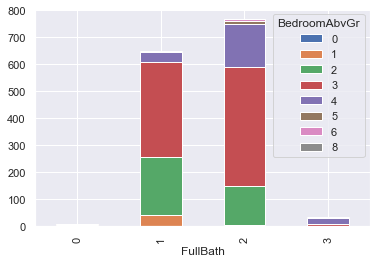

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(10, 10))
table_FB.plot(kind="bar", stacked=True)
plt.show()

#### Kiểm định FullBath và BedroomAbvGr độc lập hay ko
- H0: FullBath and BedroomAbvGr is independent
- H1: FullBath and BedroomAbvGr is not independent

**Dùng kiểm định chi bình phương**

In [86]:
# chi_square test
stat, p_value, dof, expected = scipy.stats.chi2_contingency(table_FB)


<IPython.core.display.Javascript object>

In [87]:
print("Statistic: ", stat)
print("p-value: ", p_value)
print("Dof: ", dof)

Statistic:  898.9300586036229
p-value:  9.022959522651409e-177
Dof:  21


<IPython.core.display.Javascript object>

In [91]:
prob = 0.95
critical = scipy.stats.chi2.ppf(prob, dof)  # cái này tra bảng nè
critical

32.670573340917315

<IPython.core.display.Javascript object>

### Cách 1: so sánh giá trị statistic

In [92]:
if abs(stat) >= critical:
    print("Dependent (reject H0)")
else:
    print("Independent (fail to H0)")

Dependent (reject H0)


<IPython.core.display.Javascript object>

#### Xét TotRmsAbvGrd và BedroomAbvGr

In [95]:
table_TB = pd.crosstab(df.TotRmsAbvGrd, df.BedroomAbvGr)
table_TB

BedroomAbvGr,0,1,2,3,4,5,6,8
TotRmsAbvGrd,,,,,,,,
2,0,1,0,0,0,0,0,0
3,1,14,2,0,0,0,0,0
4,2,18,73,3,1,0,0,0
5,2,5,145,122,1,0,0,0
6,1,5,99,289,8,0,0,0
7,0,4,30,252,43,0,0,0
8,0,2,5,97,78,5,0,0
9,0,1,0,26,44,3,1,0
10,0,0,2,10,23,8,4,0


<IPython.core.display.Javascript object>

#### visualization

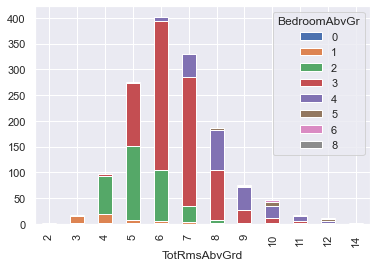

<IPython.core.display.Javascript object>

In [97]:
table_TB.plot(kind="bar", stacked=True)
plt.show()

#### kiểm định chi bình phương cho 2 biến TotRmsAbvGrd và BedroomAbvGr
- H0: TotRmsAbvGrd và BedroomAbvGr độc lập nhau
- H1 TotRmsAbvGrd và BedroomAbvGr không độc lập với nhau

In [99]:
stat, p_value, dof, expected = scipy.stats.chi2_contingency(table_TB)

<IPython.core.display.Javascript object>

In [100]:
print('Statistic: ', stat)
print('p-value: ', p_value)
print('Dof: ', dof)


Statistic:  2994.5153380852435
p-value:  0.0
Dof:  77


<IPython.core.display.Javascript object>

### Cách 2: so sánh p_value

In [102]:
prob = 0.95
alpha = 1 - prob
if p_value < alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


<IPython.core.display.Javascript object>

In [103]:
"""
=> TotRmsAbvGrd và BedroomAbvGr phụ thuộc nhau
"""

'\n=> TotRmsAbvGrd và BedroomAbvGr phụ thuộc nhau\n'

<IPython.core.display.Javascript object>

#### xét 2 biến TotRmsAbvGrd và FullBath với H0 là 2 biến độc lập

In [104]:
table_TF = pd.crosstab(df.TotRmsAbvGrd, df.FullBath)
table_TF

FullBath,0,1,2,3
TotRmsAbvGrd,,,,
2,0,1,0,0
3,1,16,0,0
4,4,79,14,0
5,1,210,63,1
6,2,226,174,0
7,1,80,245,3
8,0,29,154,4
9,0,8,61,6
10,0,1,39,7


<IPython.core.display.Javascript object>

In [106]:
stat, p_value, dof, expected = scipy.stats.chi2_contingency(table_TF)

<IPython.core.display.Javascript object>

In [107]:
print("Statistic: ", stat)
print("p-value: ", p_value)
print("Dof: ", dof)

Statistic:  694.2666939982373
p-value:  8.398586715893504e-125
Dof:  33


<IPython.core.display.Javascript object>

In [111]:
prob = 0.95
critical = scipy.stats.chi2.ppf(prob, dof)
critical

47.39988391908093

<IPython.core.display.Javascript object>

In [112]:
if abs(critical) >= stat:
    print("Dependent (reject H0)")
else:
    print("Independent (fail to reject H0)")

Independent (fail to reject H0)


<IPython.core.display.Javascript object>

In [113]:
"""
TotRmsAbvGrd và FullBath với H0 là 2 biến độc lập
"""

'\nTotRmsAbvGrd và FullBath với H0 là 2 biến độc lập\n'

<IPython.core.display.Javascript object>

### Categorical & Continuous
- Tìm hiểu 'FullBath' có bị ảnh hưởng bởi 'LotArea'? => ANOVA ONEWAY

#### Visualization

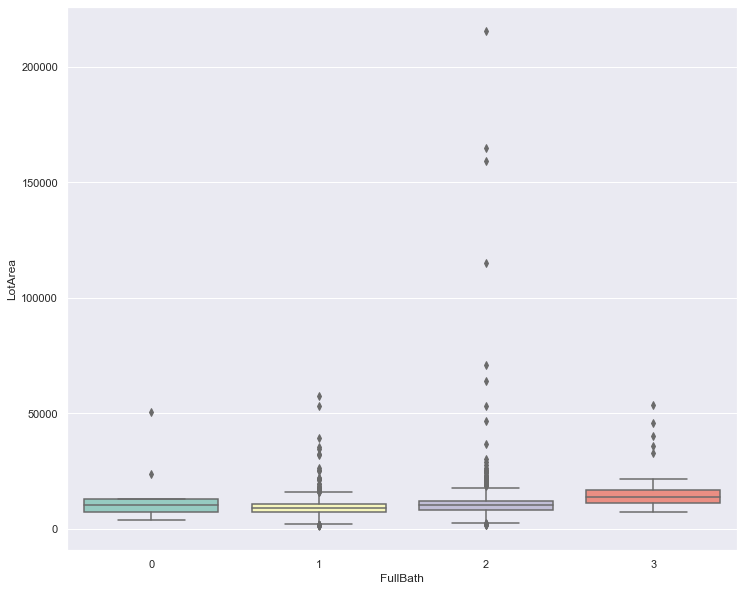

<IPython.core.display.Javascript object>

In [125]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, x="FullBath", y="LotArea", palette="Set3")
plt.show()

In [126]:
model = ols("LotArea ~ C(FullBath)", data=df).fit()

<IPython.core.display.Javascript object>

In [127]:
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(FullBath),3.0,3.332090e+09,1.110697e+09,11.386809,2.207543e-07
Residual,1456.0,1.420217e+11,9.754240e+07,NaN,NaN


<IPython.core.display.Javascript object>

p value thu dc từ phân tích ANOVA có ý nghĩa thống kê (P < 5%)
Kết luận: LotArea ảnh hưởng đáng kể đến FullBath

In [128]:
"""
p value thu dc từ phân tích ANOVA có ý nghĩa thống kê (P < 5%)
Kết luận: LotArea ảnh hưởng đáng kể đến FullBath
"""

'\np value thu dc từ phân tích ANOVA có ý nghĩa thống kê (P < 5%)\nKết luận: LotArea ảnh hưởng đáng kể đến FullBath\n'

<IPython.core.display.Javascript object>

In [131]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df["LotArea"], groups=df["FullBath"], alpha=0.05)

print(m_comp)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
     0      1 -5695.6583 0.3146 -14221.4451  2830.1286  False
     0      2 -3587.0109 0.6772  -12103.848  4929.8263  False
     0      3  2477.0404    0.9  -7075.4392   12029.52  False
     1      2  2108.6474  0.001    754.7975  3462.4974   True
     1      3  8172.6987  0.001   3639.9003 12705.4971   True
     2      3  6064.0513 0.0032   1548.1091 10579.9935   True
-------------------------------------------------------------


<IPython.core.display.Javascript object>

Các kết quả trên từ Tukey HSD cho thấy 0-1, 0-2, 0-3: chấp nhận Ho, các so sánh cặp khác\
về số phòng bác bỏ Ho và chỉ ra sự khác biệt đáng kể về mặt thống kê.

In [132]:
"""
Các kết quả trên từ Tukey HSD cho thấy 0-1, 0-2, 0-3: chấp nhận Ho, các so sánh cặp khác
về số phòng bác bỏ Ho và chỉ ra sự khác biệt đáng kể về mặt thống kê.
"""

'\nCác kết quả trên từ Tukey HSD cho thấy 0-1, 0-2, 0-3: chấp nhận Ho, các so sánh cặp khác\nvề số phòng bác bỏ Ho và chỉ ra sự khác biệt đáng kể về mặt thống kê.\n'

<IPython.core.display.Javascript object>

## C. Kiểm tra và thay thế dữ liệu bị thiếu

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   1stFlrSF      1460 non-null   int64
 3   2ndFlrSF      1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   BedroomAbvGr  1460 non-null   int64
 6   TotRmsAbvGrd  1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


<IPython.core.display.Javascript object>

In [137]:
df.isnull().sum()

LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64

<IPython.core.display.Javascript object>

In [138]:
"""
quan sát bảng df.isnull().sum(), ta thấy ko có dữ liệu nào bị thiếu.
"""

'\nquan sát bảng df.isnull().sum(), ta thấy ko có dữ liệu nào bị thiếu.\n'

<IPython.core.display.Javascript object>

## D. Phát hiện và xử lý outliers

In [141]:
fetures = [
    "LotArea",
    "YearBuilt",
    "1stFlrSF",
    "2ndFlrSF",
    "FullBath",
    "BedroomAbvGr",
    "TotRmsAbvGrd",
]

<IPython.core.display.Javascript object>

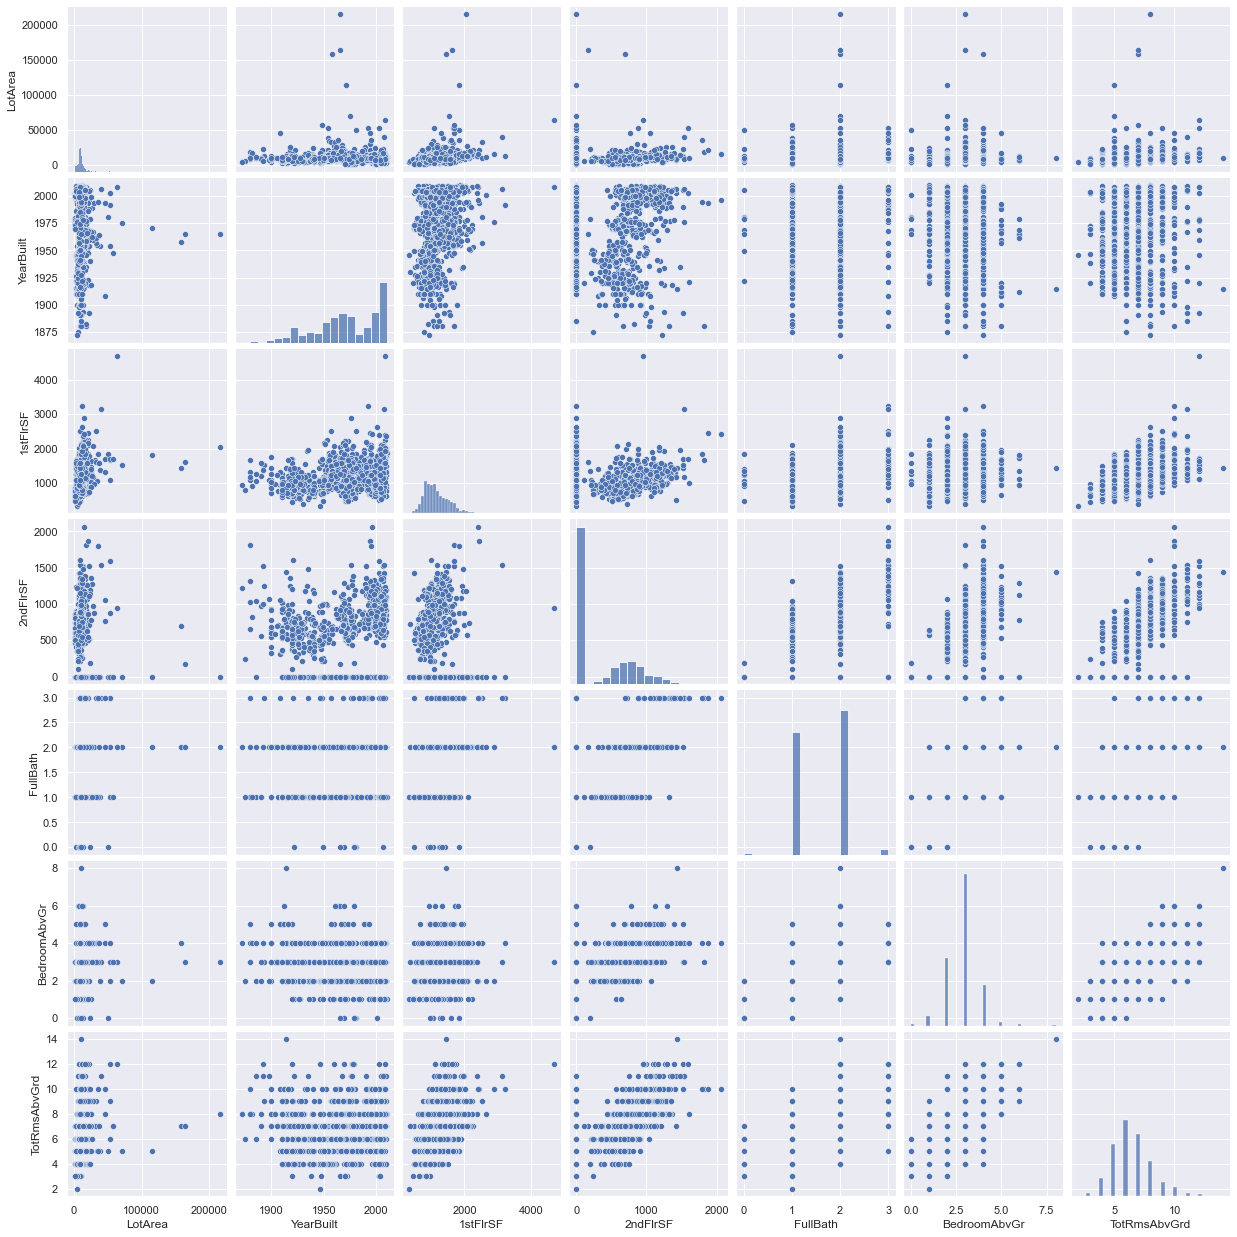

<IPython.core.display.Javascript object>

In [145]:
sns.pairplot(df[fetures])
plt.show()

### Xét biến 1stFlrSF

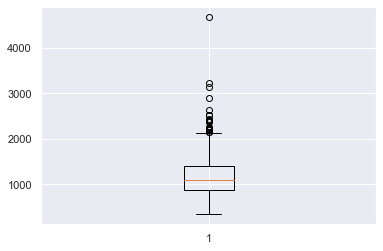

<IPython.core.display.Javascript object>

In [146]:
plt.boxplot(df["1stFlrSF"])
plt.show()

In [159]:
Q11 = np.percentile(df["1stFlrSF"], 25)
Q31 = np.percentile(df["1stFlrSF"], 75)
IQR1 = scipy.stats.iqr(df["1stFlrSF"])

<IPython.core.display.Javascript object>

In [160]:
# Number of upper outliers (xét upper outliers vì dựa vào biểu đồ boxplot, ko có lower outliers)
n_O_upper1 = df[df["1stFlrSF"] > (Q31 + 1.5 * IQR1)].shape[0]
n_O_upper1

20

<IPython.core.display.Javascript object>

### Xét biến 2stFlrSF

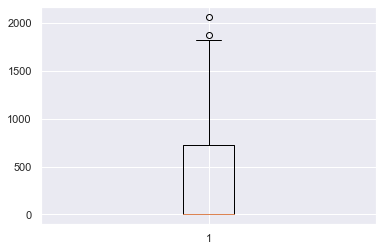

<IPython.core.display.Javascript object>

In [161]:
plt.boxplot(df["2ndFlrSF"])
plt.show()

In [162]:
Q12 = np.percentile(df["2ndFlrSF"], 25)
Q32 = np.percentile(df["2ndFlrSF"], 75)
IQR2 = scipy.stats.iqr(df["2ndFlrSF"])

<IPython.core.display.Javascript object>

In [163]:
# Number of upper outliers
n_O_upper2 = df[df["2ndFlrSF"] > (Q32 + 1.5 * IQR2)].shape[0]
n_O_upper2

2

<IPython.core.display.Javascript object>

## Xét LotArea

In [165]:
Q1_lot = np.quantile(df.LotArea.dropna(), 0.25)
Q3_lot = np.quantile(df.LotArea.dropna(), 0.75)


IQR_lot = scipy.stats.iqr(df.LotArea.dropna())
IQR_lot

4048.0

<IPython.core.display.Javascript object>

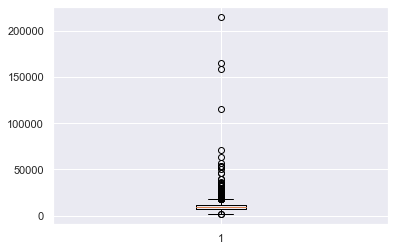

<IPython.core.display.Javascript object>

In [166]:
plt.boxplot(df["LotArea"])
plt.show()

In [171]:
n_O_upper = df[df.LotArea > Q3_lot + 1.5 * IQR_lot].shape[0]
n_O_lower = df[df.LotArea < Q1_lot - 1.5 * IQR_lot].shape[0]


<IPython.core.display.Javascript object>

In [172]:
# Percentage of ouliers
outliers_per = (n_O_lower + n_O_upper + n_O_upper1 + n_O_upper2) / df.shape[0]
outliers_per

0.06232876712328767

<IPython.core.display.Javascript object>

- Có thể drop doutliers của '2ndFlrSF', '1stFlrSF', 'LotArea': vì tổng số outliers là 6% dữ liệu
- Cũng có thể không cần drop thay vào đó khi áp dụng Machine Learning thì dùng thuật toán
Decision Tree/ Random Forest (LDS6)

In [173]:
"""
Có thể drop doutliers của '2ndFlrSF', '1stFlrSF', 'LotArea': vì tổng số outliers là 6% dữ liệu
Cũng có thể không cần drop thay vào đó khi áp dụng Machine Learning thì dùng thuật toán
Decision Tree/ Random Forest (LDS6)
"""

"\nCó thể drop doutliers của '2ndFlrSF', '1stFlrSF', 'LotArea': vì tổng số outliers là 6% dữ liệu\nCũng có thể không cần drop thay vào đó khi áp dụng Machine Learning thì dùng thuật toán\nDecision Tree/ Random Forest (LDS6)\n"

<IPython.core.display.Javascript object>

In [218]:
# IQR1 là IQR của 1stFlrSF
df_now = df[(df["1stFlrSF"] <= (Q31 + 1.5 * IQR1))]

<IPython.core.display.Javascript object>

In [219]:
# IQR2 là IQR của 2stFlrSF
df_now = df_now[(df_now["2ndFlrSF"] <= (Q32 + 1.5 * IQR2))]

<IPython.core.display.Javascript object>

In [220]:
# Q1_lot, Q3_lot, IQRlot là của LotArea

df_now = df_now[
    (df_now.LotArea >= (Q1_lot - 1.5 * IQR_lot))
    & (df_now.LotArea <= (Q3_lot + 1.5 * IQR_lot))
]

<IPython.core.display.Javascript object>

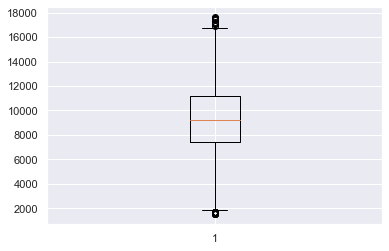

<IPython.core.display.Javascript object>

In [221]:
plt.boxplot(df_now["LotArea"])
plt.show()

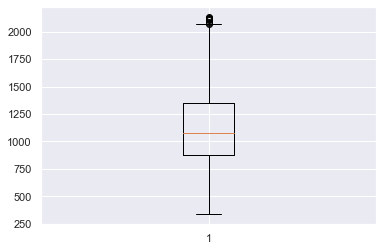

<IPython.core.display.Javascript object>

In [222]:
plt.boxplot(df_now["1stFlrSF"])
plt.show()

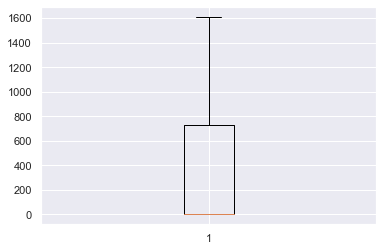

<IPython.core.display.Javascript object>

In [223]:
plt.boxplot(df_now["2ndFlrSF"])
plt.show()

In [224]:
# Xem xét thêm biên ngoài: major
# https://m.wikihow.com/Calculate-Outliers
# Công thức: O_u = Q3 + 3*IQR, O_l = Q1 - 3*IQR
# hoặc tính trung bình trước và sau khi loại bỏ outlier

<IPython.core.display.Javascript object>

### Với LotArea

In [225]:
df_now.LotArea.mean()

9228.756168359942

<IPython.core.display.Javascript object>

In [202]:
df.LotArea.mean()

10516.828082191782

<IPython.core.display.Javascript object>

In [211]:
# =>  Nên loại bỏ ngoại lệ vì chênh lệch lớn

<IPython.core.display.Javascript object>

### Với 1stFlrSF

In [212]:
df_now["1stFlrSF"].mean()

959.1784702549575

<IPython.core.display.Javascript object>

In [213]:
df["1stFlrSF"].mean()

1162.626712328767

<IPython.core.display.Javascript object>

In [214]:
# Không nhất thiết phải loại bỏ ngoại lệ vì chênh lệch nhỏ

<IPython.core.display.Javascript object>

### Với 1stFlrSF

In [215]:
df_now["2ndFlrSF"].mean()

270.4617563739377

<IPython.core.display.Javascript object>

In [216]:
df["2ndFlrSF"].mean()

346.99246575342465

<IPython.core.display.Javascript object>

In [217]:
# => # Không nhất thiết phải loại bỏ ngoại lệ vì chênh lệch nhỏ

<IPython.core.display.Javascript object>

### Kết luận về 3 biến này
- Vì 3 phân phối này đều không là phân phối chuẩn => không drop theo z-score
- Hoặc có thể xem xét chỉnh dữ liệu log(cột)